In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier
import time
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

import keras
keras.__version__

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


'2.1.3'

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten,Conv2D, MaxPooling2D, Dropout,Activation


modelConv=Sequential()

modelConv.add(Conv2D(32,(3,3),padding='same', activation='relu', input_shape=(32,32,3)))
modelConv.add(Conv2D(32,(3,3),padding='same', activation='relu'))
modelConv.add(MaxPooling2D(pool_size=(2,2))) 
modelConv.add(Dropout(0.25))

modelConv.add(Conv2D(64,(3,3),padding='same', activation='relu'))
modelConv.add(Conv2D(64,(3,3),padding='same', activation='relu'))
modelConv.add(MaxPooling2D(pool_size=(2,2))) 
modelConv.add(Dropout(0.25))

modelConv.add(Flatten())
modelConv.add(Dense(units=512, activation='relu'))
modelConv.add(Dropout(0.5))
modelConv.add(Dense(10))
modelConv.add(Activation('softmax'))
modelConv.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#historyCopy=modelConv.fit(x_train,y_train,batch_size=128,nb_epoch=20,verbose=1,validation_split=0.1)
historyConv=modelConv.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

#評価
loss_and_metrics=modelConv.evaluate(x_test,y_test,verbose=0)
print('Test loss:',loss_and_metrics[0])
print('Test accuracy:',loss_and_metrics[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 9s 214us/step - loss: 1.6803 - acc: 0.3866 - val_loss: 1.2948 - val_acc: 0.5337
Epoch 2/20
40000/40000 [==============================] - 6s 149us/step - loss: 1.2418 - acc: 0.5559 - val_loss: 1.1032 - val_acc: 0.6098
Epoch 3/20
40000/40000 [==============================] - 6s 153us/step - loss: 1.0615 - acc: 0.6239 - val_loss: 0.9155 - val_acc: 0.6799
Epoch 4/20
40000/40000 [==============================] - 6s 146us/step - loss: 0.9425 - acc: 0.6684 - val_loss: 0.8689 - val_acc: 0.6984
Epoch 5/20
40000/40000 [==============================] - 6s 146us/step - loss: 0.8510 - acc: 0.7004 - val_loss: 0.7717 - val_acc: 0.7374
Epoch 6/20
40000/40000 [==============================] - 6s 146us/step - loss: 0.7709 - acc: 0.7277 - val_loss: 0.7585 - val_acc: 0.7450
Epoch 7/20
40000/40000 [==============================] - 6s 146us/step - loss: 0.7188 - acc: 0.7464 - val_loss: 0.7091 - 

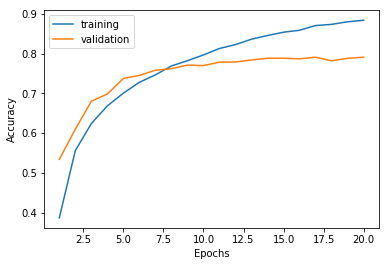

In [3]:
plt.plot(range(1, 20+1), historyConv.history['acc'], label="training")
plt.plot(range(1, 20+1), historyConv.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

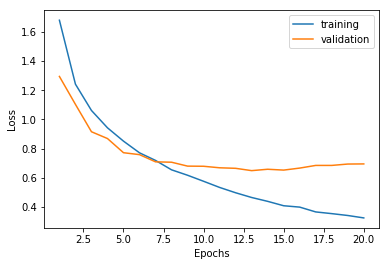

In [4]:
plt.plot(range(1, 20+1), historyConv.history['loss'], label="training")
plt.plot(range(1, 20+1), historyConv.history['val_loss'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()